# Section 1

In [1]:
import os

In [5]:
pwd()

'/home/sachin/Downloads/projectfinalfolder/temp1'

In [3]:
path = '/home/sachin/Downloads/projectfinalfolder/temp1'

In [38]:
path = '/home/sachin/Downloads/projectfinalfolder/part2-b'

In [39]:
os.chdir(path)

In [40]:
pwd()

'/home/sachin/Downloads/projectfinalfolder/part2-b'

In [43]:
# import sys
# !{sys.executable} -m pip install time
# AP is array of all non-zeros element from arr
# Importing all the libraries needed and dataset used 
# please upload the dataset in csv formate and replace filename value
# with the name of dataset file
dataset_name = "vrv218gr-upmedian.csv"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6
import time
df = pd.read_csv(dataset_name,header=None)
arr = np.array(df)
N=len(arr)

In [44]:
AP = [] 
for i in range(len(arr)):
  if (arr[i]!=0):
    AP.append(arr[i])
lap=len(AP)

In [64]:
# Here we are using different permutaion of AP and replacing the 
# sequence of non zeros element from arr and saving it to arr2
# and finally repeating this process 100 times
for i in range(100):
  arr2=arr.copy()
  c2=-1
  APrand = np.random.permutation(AP)
  for c in range(N):
    if (arr2[c]!=0):
      c2+=1
      arr2[c]=APrand[c2]
  filename='timesr_gr_ranap'+str(i+1)+'.csv';
  pd.DataFrame(arr2).to_csv(filename,index=False)

# Section 2

In [65]:
# Here we use Window function and take windows of size steps 
# and calculate conv value of the randome generated files in section 1
# and save these files to a new set of values
# section 2 is only one part of it 
# it will be repeacted 100 times after this

In [66]:
arr2=arr.copy()
ncol=N=len(arr)
steps = int(input())

10


In [67]:
# arr2.shape is (37610, 1)
# all the files names in the formate 'timesr_gr_ranap1.csv'
# are just some random variations of the file arr

In [68]:
def window(arr,w):
  ans = []
  a = len(arr)
  b=len(w)
  ans.append(arr[b-1])
  for i in range(b,a):
    ans.append(arr[i]-arr[i-b])
  return ans

In [69]:
# arr3 is derived from arr2 to simplify our windows function
arr3=arr2.copy()
temp=0
for i in range(len(arr3)):
  arr3[i]=temp+arr3[i]
  temp=arr3[i]
arr3.shape

(351, 1)

In [70]:
c=0
for w in(range(1,N+1,steps)):    # {c = N/steps}            
    c=c+1
lacscan = np.random.rand(c)
box_size=range(1,N+1,steps)
c=0
# lacscan.shape
# np.array(box_size).shape

In [71]:
# lacscan is an array which have N/step random

In [72]:
np.array(box_size).shape

(36,)

In [73]:
t=time.time()
for wind in range(1,N+1,steps):
    mom1=0 
    v=0 
    mom2=0
    w = np.ones(wind)
    s = window(arr3,w)
    mom1 = np.mean(s)                             
    v=np.var(s)
    mom2 = pow(mom1,2)+v
    lacscan[c] = mom2/pow(mom1,2)
    c=c+1
elapsed=time.time()-t
elapsed

0.026314735412597656

In [74]:
a = np.array(box_size)
b = np.array(lacscan) 
L = []
L.append(a)
L.append(b)
arrL = np.array(L)

In [75]:
filename='lac_timesr_gr'+'.csv'
df = pd.DataFrame(arrL)
df.to_csv(filename,index=False,header=False)

In [76]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1.000000,11.000000,21.000000,31.000000,41.000000,51.000000,61.000000,71.000000,81.000000,91.000000,...,261.000000,271.000000,281.000000,291.00000,301.00000,311.000000,321.000000,331.000000,341.000000,351.0
1,2.004286,1.169182,1.113554,1.084607,1.064847,1.051078,1.040478,1.030779,1.023917,1.019473,...,1.001502,1.000856,1.000376,1.00014,1.00009,1.000098,1.000097,1.000043,1.000024,1.0


In [77]:
df = pd.read_csv(filename,header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1.000000,11.000000,21.000000,31.000000,41.000000,51.000000,61.000000,71.000000,81.000000,91.000000,...,261.000000,271.000000,281.000000,291.00000,301.00000,311.000000,321.000000,331.000000,341.000000,351.0
1,2.004286,1.169182,1.113554,1.084607,1.064847,1.051078,1.040478,1.030779,1.023917,1.019473,...,1.001502,1.000856,1.000376,1.00014,1.00009,1.000098,1.000097,1.000043,1.000024,1.0


Text(0, 0.5, 'log lacunarity L(r)')

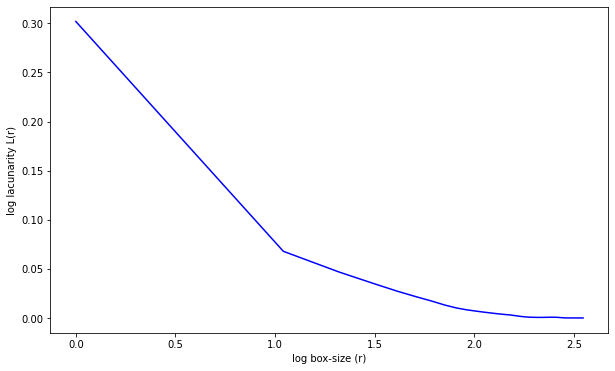

In [78]:
plt.figure;
plt.plot(np.log10(box_size),np.log10(lacscan),'b-')
plt.xlabel('log box-size (r)')
plt.ylabel('log lacunarity L(r)')

In [79]:
temp = pd.read_csv('lac_timesr_gr.csv',header=None)

In [80]:
temp.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1.000000,11.000000,21.000000,31.000000,41.000000,51.000000,61.000000,71.000000,81.000000,91.000000,...,261.000000,271.000000,281.000000,291.00000,301.00000,311.000000,321.000000,331.000000,341.000000,351.0
1,2.004286,1.169182,1.113554,1.084607,1.064847,1.051078,1.040478,1.030779,1.023917,1.019473,...,1.001502,1.000856,1.000376,1.00014,1.00009,1.000098,1.000097,1.000043,1.000024,1.0


In [81]:
arr3=arr2.copy()
temp=0
for i in range(len(arr3)):
  arr3[i]=temp+arr3[i]
  temp=arr3[i]

# Section 3

In [82]:
def window(arr,w):
  ans = []
  a = len(arr)
  b=len(w)
  ans.append(arr[b-1])
  for i in range(b,a):
    ans.append(arr[i]-arr[i-b])
  return ans

In [83]:
k1 = int(input("START AT random realization..."))
k2 = int(input("UPTO random realization..."))
data = pd.read_csv("lac_timesr_gr.csv",header=None)
arr2 = np.array(data)
arr2=arr.copy()
k=k2-k1+1
NN=len(arr2)
lacall=np.random.rand(NN,k)

START AT random realization...1
UPTO random realization...100


In [84]:
filename = "timesr_gr_ranap"+str(1)+".csv"
SCAN = np.array(pd.read_csv(filename))
N=len(SCAN)
for w in range(1,N+1,10):
    c=c+1
lacSCAN=np.random.rand(c)
box_size=range(1,N+1,10)

In [85]:
np.array(box_size).shape

(36,)

In [86]:
t=time.time()
for i in range(k1,k2+1):
  filename = "timesr_gr_ranap"+str(i)+".csv"
  SCAN = np.array(pd.read_csv(filename))
  N=len(SCAN)
  arr3=SCAN.copy()
  temp=0                              #
  for j in range(len(arr3)):          #
    arr3[j]=temp+arr3[j]              #
    temp=arr3[j]                      #
  c=0
  for w in range(1,N+1,steps):
    c=c+1
  lacscan=np.random.rand(c)
  box_size=range(1,N+1,steps)
  c=0
  for wind in range(1,N+1,steps):
    mom1=0 
    v=0 
    mom2=0
    w = np.ones(wind)
    s = window(arr3,w)
    mom1 = np.mean(s)                             
    v=np.var(s)
    mom2 = pow(mom1,2)+v
    lacscan[c] = mom2/pow(mom1,2)
    c=c+1
  a = np.array(box_size)
  b = np.array(lacscan) 
  L = []
  L.append(a)
  L.append(b)
  arrL = np.array(L)
  filename='lac_timesr_gr_ranap'+str(i)+'.csv'
  df = pd.DataFrame(arrL)
  df.to_csv(filename,header=None,index=None)
t2 = time.time()-t
t2

3.1668312549591064

# Section 4

In [87]:
data = pd.read_csv("lac_timesr_gr.csv",header=None)
Ld = np.array(data.iloc[1][:])
r = np.array(data.iloc[0][:])
Ldiv_all = []

In [88]:
for k in range(1,101):
    filename="lac_timesr_gr_ranap"+str(k)+".csv"
    random = pd.read_csv(filename,header=None)
    Lr = np.array(random.iloc[1][:])
    Ldiv=np.divide(Ld,Lr)
    for i in range(len(Ldiv)):
        if Lr[i]==0:
            Ldiv[i]=0
    Ldiv_all.append(Ldiv)
for k in range(50,101):
    filename="lac_timesr_gr_ranap"+str(k)+".csv"
    random = pd.read_csv(filename,header=None)
    Lr = np.array(random.iloc[1][:])
    Ldiv=np.divide(Ld,Lr)
    for i in range(len(Ldiv)):
        if Lr[i]==0:
            Ldiv[i]=0
    Ldiv_all.append(Ldiv)

In [89]:
p25 = np.percentile(Ldiv_all,25,axis=0)
p50 = np.percentile(Ldiv_all,50,axis=0)
p75 = np.percentile(Ldiv_all,75,axis=0)
Lavg= np.mean(Ldiv_all,axis=0)

In [90]:
r.shape

(36,)

Text(0, 0.5, 'Ldata / Lran')

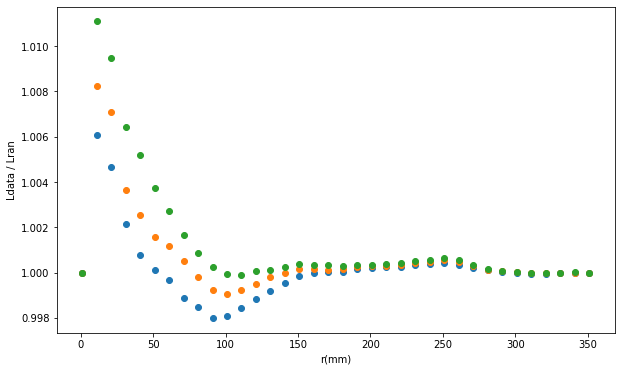

In [91]:
# plt.scatter(np.log10(r),p25) 
# plt.scatter(np.log10(r),p50)
# plt.scatter(np.log10(r),p75) 
# plt.scatter(np.log10(r),Lavg,'b')
# plt.xlabel('r(mm)')
# plt.ylabel('Ldata / Lran')

plt.scatter(r,p25) 
plt.scatter(r,p50)
plt.scatter(r,p75) 
# plt.scatter(r,Lavg,'b')
plt.xlabel('r(mm)')
plt.ylabel('Ldata / Lran')

Text(0, 0.5, 'Ldata / Lran')

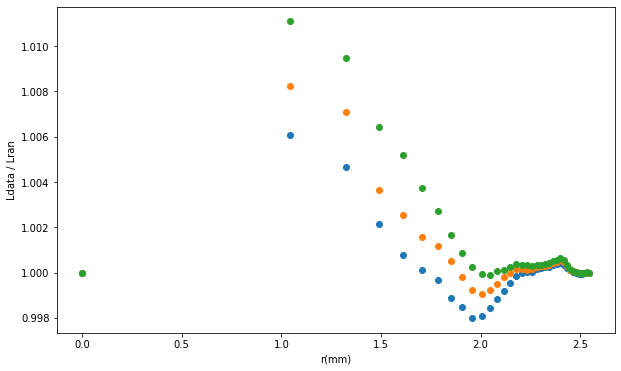

In [92]:
plt.scatter(np.log10(r),p25) 
plt.scatter(np.log10(r),p50)
plt.scatter(np.log10(r),p75) 
# plt.scatter(np.log10(r),Lavg,'b')
plt.xlabel('r(mm)')
plt.ylabel('Ldata / Lran')

(0.0, 2.0)

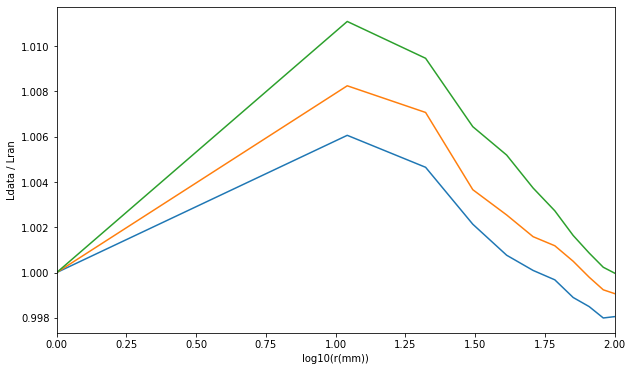

In [95]:
plt.plot(np.log10(r),p25) 
plt.plot(np.log10(r),p50)
plt.plot(np.log10(r),p75) 
# plt.scatter(np.log10(r),Lavg,'b')
plt.xlabel('log10(r(mm))')
plt.ylabel('Ldata / Lran')
plt.xlim(left=0,right=2)

(2.0, 2.672572472289115)

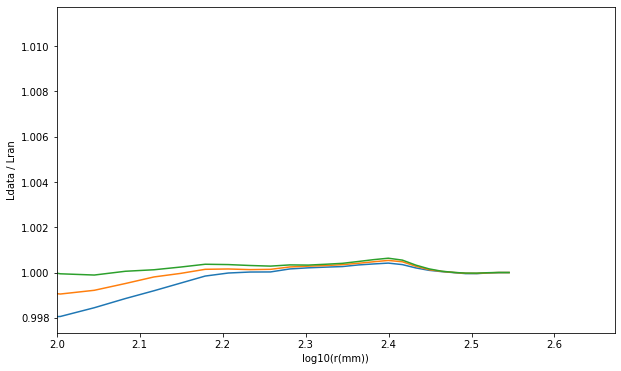

In [96]:
plt.plot(np.log10(r),p25) 
plt.plot(np.log10(r),p50)
plt.plot(np.log10(r),p75) 
# plt.scatter(np.log10(r),Lavg,'b')
plt.xlabel('log10(r(mm))')
plt.ylabel('Ldata / Lran')
plt.xlim(left=2)

In [62]:
data = pd.read_csv("lac_timesr_gr_ranap1.csv",header=None)
Ld = np.array(data.iloc[1][:])
r = np.array(data.iloc[0][:])
Ldiv_all = []
for k in range(1,101):
    filename="lac_timesr_gr_ranap"+str(k)+".csv"
    random = pd.read_csv(filename,header=None)
    Lr = np.array(random.iloc[1][:])
    Ldiv=np.divide(Ld,Lr)
    for i in range(len(Ldiv)):
        if Lr[i]==0:
            Ldiv[i]=0
    Ldiv_all.append(Ldiv)
for k in range(50,101):
    filename="lac_timesr_gr_ranap"+str(k)+".csv"
    random = pd.read_csv(filename,header=None)
    Lr = np.array(random.iloc[1][:])
    Ldiv=np.divide(Ld,Lr)
    for i in range(len(Ldiv)):
        if Lr[i]==0:
            Ldiv[i]=0
    Ldiv_all.append(Ldiv)

Text(0, 0.5, 'Ldata / Lran')

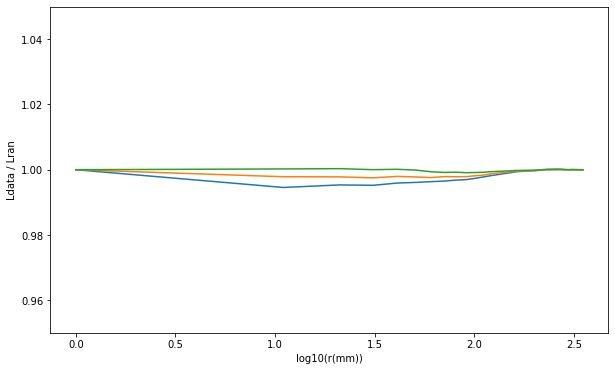

In [63]:
p25 = np.percentile(Ldiv_all,25,axis=0)
p50 = np.percentile(Ldiv_all,50,axis=0)
p75 = np.percentile(Ldiv_all,75,axis=0)
Lavg= np.mean(Ldiv_all,axis=0)
plt.ylim([0.95,1.05])
plt.plot(np.log10(r),p25) 
plt.plot(np.log10(r),p50)
plt.plot(np.log10(r),p75) 
# plt.scatter(np.log10(r),Lavg,'b')
plt.xlabel('log10(r(mm))')
plt.ylabel('Ldata / Lran')